In [1]:
#The dataset you provided seems to be related to customer churn analysis. 
#In this context, "churn" refers to customers who have stopped using a service.
#Here’s how you can frame a machine learning project around this dataset:

## Importing Libraries

In [2]:
import pandas as pd   
import numpy as np

## 1.Import the data

In [3]:
file= pd.read_csv(r"F:\ML_Project_Telecom_Customer_Churn\Telco-Customer-Churn.csv")  #Reading/Loading the dataset file
df = pd.DataFrame(file)   #readedloaded file converted into DataFrame
df     #displaying the  given dataset                               

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df["Churn"] = df["Churn"].map({"Yes":1,"No":0}) #categorical to numerical converted by map()

## Steps to Involve 

## 2.Data Preprocessing:

In [5]:
df.dtypes     #checking datatypes of the each column data

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)    #Replace empty strings with NaN

df["TotalCharges"] = df["TotalCharges"].astype(float)  #Convert to float
df = df.dropna(subset=["TotalCharges"]) #Optionally, you can drop rows with NaN values if necessary
df.dtypes['TotalCharges']  #checking totalcharges column data converted to float or not 

dtype('float64')

## 3.Handling missing values for NULL value

In [7]:
df.isna().sum()    #finding missing value and NULL Values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['tenure'].max()      #checking max value for tenure

72

In [9]:
df['tenure'].min()     #checking min value for tenure

1

In [10]:
df['MonthlyCharges'].max()    #checking max value for monthlycharges

118.75

In [11]:
df['MonthlyCharges'].min()      #checking min value for monthlycharges

18.25

In [12]:
df['TotalCharges'].isna().sum()       #checking max value for totalcharges

0

In [13]:
df['TotalCharges'].min()        #checking min value for totalcharges

18.8

In [14]:
df['TotalCharges'].dtypes

dtype('float64')

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
#df['TotalCharges'] = df['TotalCharges'].replace(" ")    #replace numerical+string to numeric value 

#df['TotalCharges'] = df['TotalCharges'].astype(float)   #convert numeric value to float

## Numrical Scaling

In [17]:
print(df['TotalCharges'].isna().sum())
print()
print(df['TotalCharges'].max())
print()
print(df['TotalCharges'].min())

0

8684.8

18.8


In [18]:
print(df['MonthlyCharges'].max())
print()
print(df['MonthlyCharges'].min())

118.75

18.25


In [19]:
print(df['tenure'].max())
print()
print(df['tenure'].min())

72

1


## 4.Use Visualization Libraries to Understad Data distribution and Relationships

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## A.Basic Data Distribution

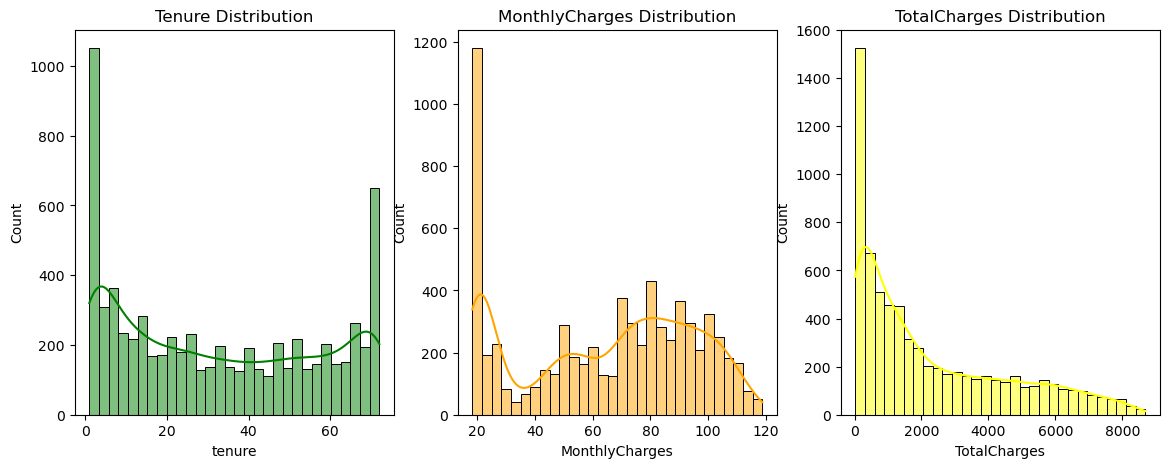

In [21]:
plt.figure(figsize= (14, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['tenure'],kde=True, bins=30,color='Green')
plt.title('Tenure Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'],kde=True, bins=30,color='Orange')
plt.title('MonthlyCharges Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'],kde=True, bins=30,color='Yellow')
plt.title('TotalCharges Distribution')

plt.show()

## B. Categoriacal Data Analysis

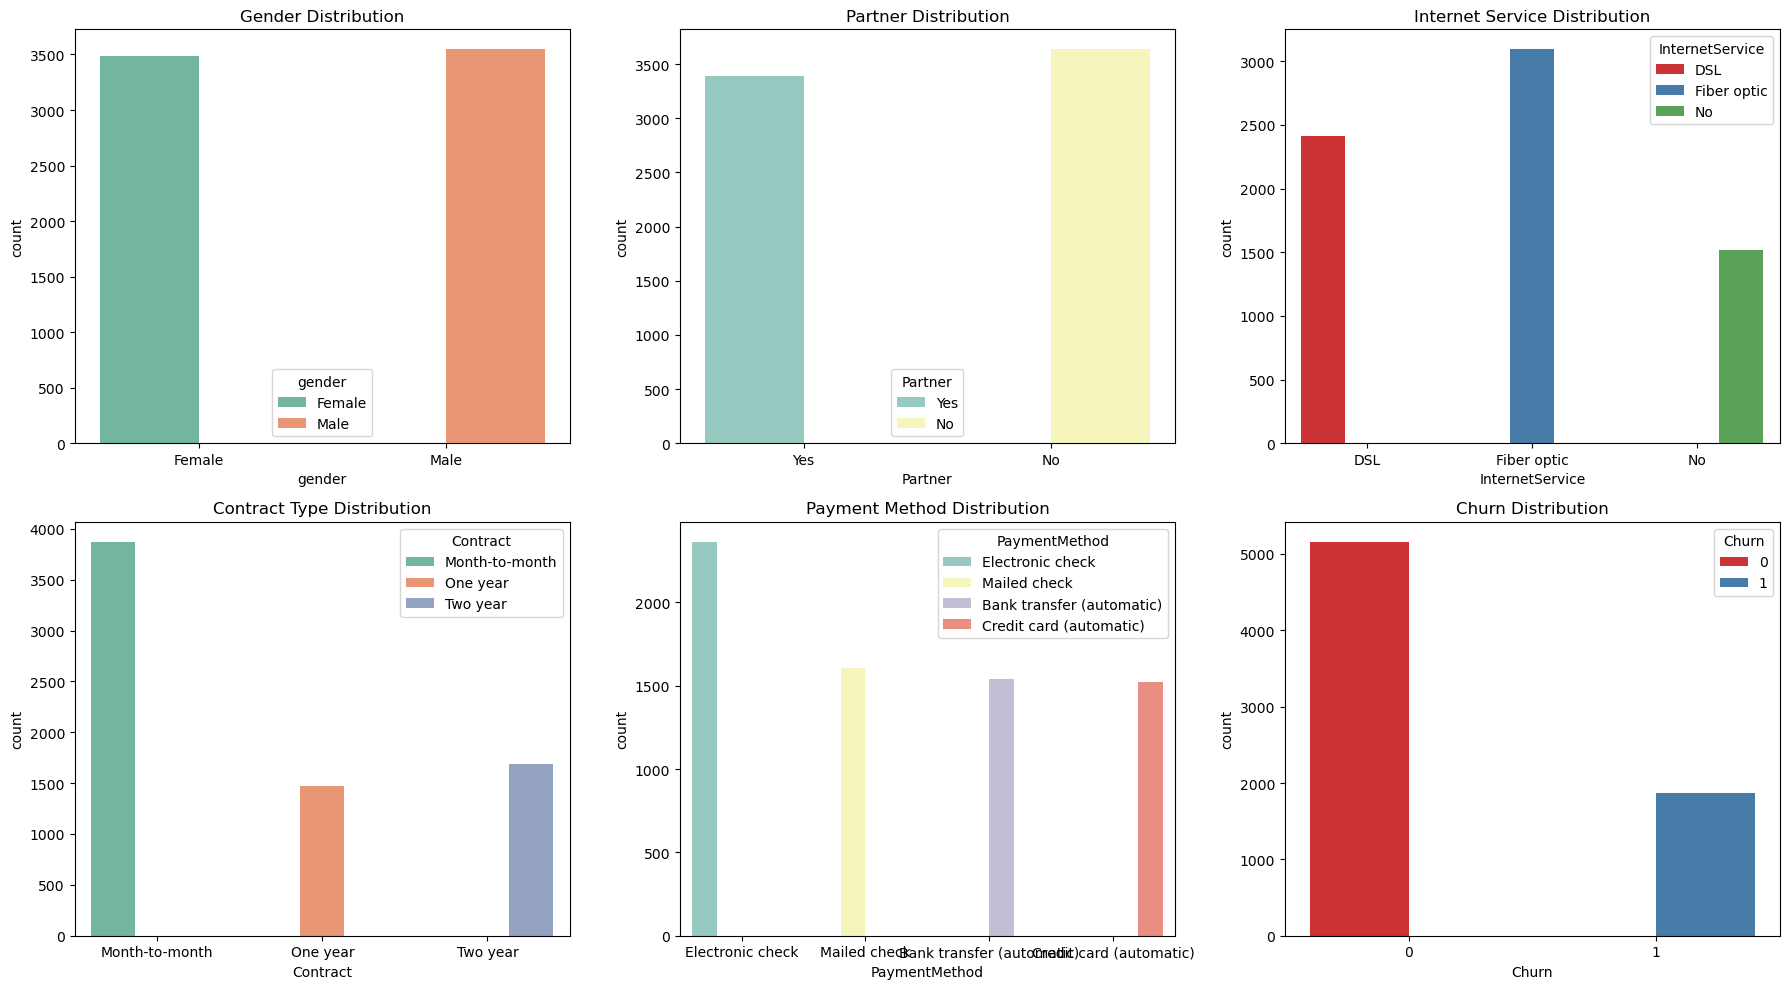

In [22]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='gender', hue='gender', palette='Set2')
plt.title('Gender Distribution')
   
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Partner', hue='Partner', palette='Set3')
plt.title('Partner Distribution')

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='InternetService', hue='InternetService', palette='Set1')
plt.title('Internet Service Distribution')

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Contract', hue='Contract', palette='Set2')
plt.title('Contract Type Distribution')

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='PaymentMethod', hue='PaymentMethod', palette='Set3')
plt.title('Payment Method Distribution')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set1')
plt.title('Churn Distribution')

plt.tight_layout()
plt.show()

## C.Analyzing Relationship between Features

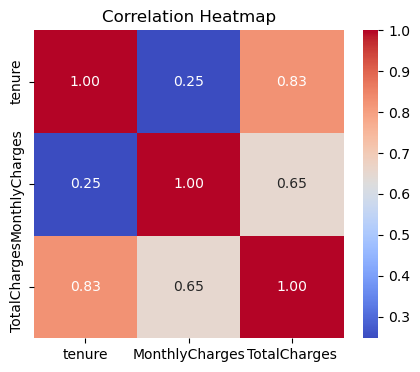

In [23]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 5.For relationships involving categorical data, use box plots or violin plots

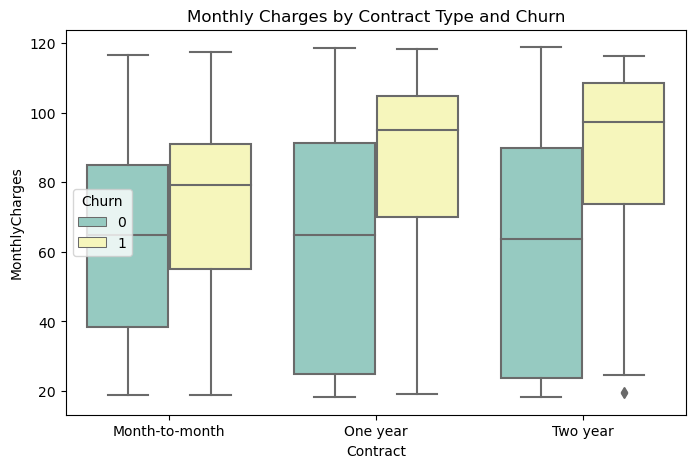

In [24]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn', palette='Set3')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

## Exploring relationship between Multiple Features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


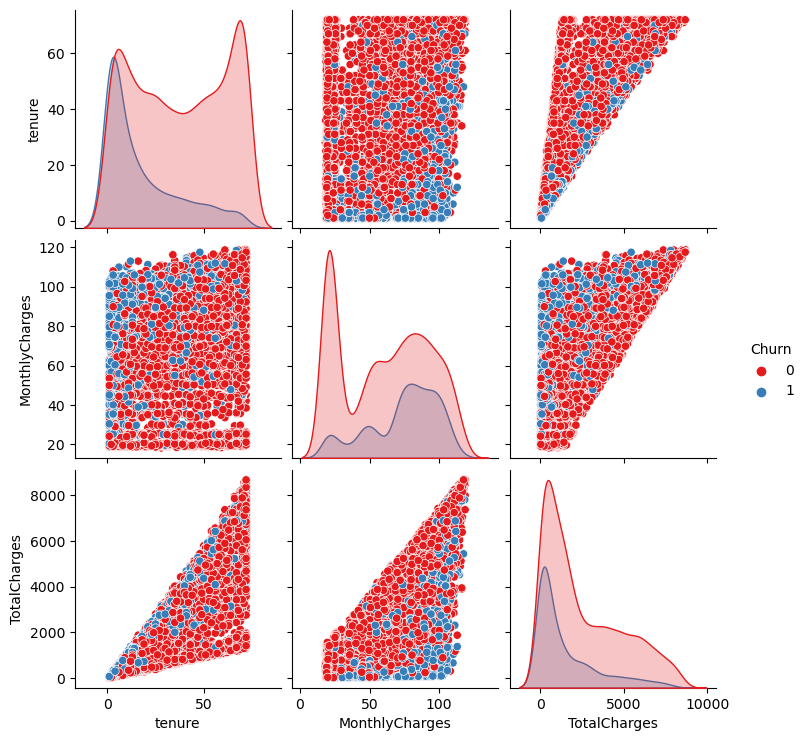

In [25]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='Set1')
plt.show()

## 6.Splitting the data into Training and Testing Sets

## Checking Balanced or Imbalanced Data

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [27]:
X = df.drop(columns= "Churn",axis=1)  #independent variable
y = df["Churn"]                       #dependent variable

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)  #splited X ,y variable

In [30]:
print(X.shape) 
print()
print(y.shape)

(7032, 20)

(7032,)


In [31]:
from collections import Counter

In [32]:
Counter(y)    #Imbalanced dta heckingis non visualization technique

Counter({0: 5163, 1: 1869})

In [33]:
#80%,20% data received which is imbalnced data

In [34]:
import seaborn as sns  #To check imbalanced data set in visualization

<Axes: xlabel='Churn', ylabel='count'>

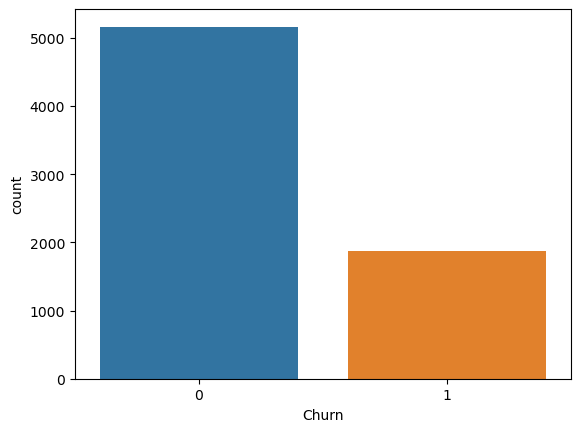

In [35]:
sns.countplot(data=df,x=y)  #Count plot using to show the %data in the dataset

In [36]:
pip install imblearn  #Solving  Imbalanced data

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Solving'


In [37]:
import warnings

In [38]:
df.drop(columns= "customerID",axis=1,inplace=True) #its not giving  best feature in target variable it will give less acuracy and less importance to the target variable so it will not useful for our dataset

C:\Users\DELL\AppData\Local\Temp\ipykernel_6576\774549899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= "customerID",axis=1,inplace=True) #its not giving  best feature in target variable it will give less acuracy and less importance to the target variable so it will not useful for our dataset


In [39]:
from sklearn.model_selection import train_test_split

## Creating pipeline to convert Categorical to Numerical and vice a versa

In [40]:
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [41]:
numerical_transformed =["tenure","MonthlyCharges","TotalCharges"]
categorical_features_one_hot = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                                'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
categorical_features_ordinal = ['SeniorCitizen']

In [42]:
numerical = Pipeline(steps = [
    ("Range",MinMaxScaler())
])

one_hot_encoding = Pipeline(steps=[
    ("onehot",OneHotEncoder(handle_unknown="ignore",drop= "first"))
])

ordinal_encoding =Pipeline(steps = [("ordinal",OrdinalEncoder())
])

## Combining all transformation using Column Transformer

In [43]:
preprocessing =ColumnTransformer(
          transformers=[("num",numerical, numerical_transformed),
                       ("onehot",one_hot_encoding,categorical_features_one_hot),
                       ("ordinal",ordinal_encoding,categorical_features_ordinal)
                       ])

## Fit and Transform X_train,Transform X_text

In [44]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

## Convert Transformed Data Back to the DataFrame

In [45]:
feaure_names = preprocessing.get_feature_names_out()

X_train_transformed = pd.DataFrame(X_train_transformed,columns=feaure_names)
X_test_transformed = pd.DataFrame(X_test_transformed,columns=feaure_names)

In [46]:
X_test_transformed

,num__tenure,num__MonthlyCharges,num__TotalCharges,onehot__gender_Male,onehot__Partner_Yes,onehot__Dependents_Yes,onehot__PhoneService_Yes,onehot__MultipleLines_No phone service,onehot__MultipleLines_Yes,onehot__InternetService_Fiber optic,...,onehot__StreamingTV_Yes,onehot__StreamingMovies_No internet service,onehot__StreamingMovies_Yes,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes,onehot__PaymentMethod_Credit card (automatic),onehot__PaymentMethod_Electronic check,onehot__PaymentMethod_Mailed check,ordinal__SeniorCitizen
0,0.253521,0.812935,0.220742,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.859155,0.534826,0.492199,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.028169,0.421891,0.020552,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.056338,0.067662,0.012312,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.338028,0.704975,0.271129,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.295775,0.713930,0.227902,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1403,0.000000,0.595025,0.006837,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1404,0.422535,0.779602,0.329927,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1405,0.056338,0.573632,0.039113,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
X_train_transformed["num__TotalCharges"].isna().sum()

0

In [48]:
#pip install scikit-learn==1.2.2

In [49]:
from imblearn.over_sampling import SMOTE   #to balance imbalnce data using SMOTE

In [50]:
sm  = SMOTE(random_state= 26,k_neighbors=3)
X_train_transformed_resample,y_train_resample= sm.fit_resample(X_train_transformed,y_train)

In [51]:
Counter(y_train_resample)

Counter({1: 4134, 0: 4134})

## 7.Choose a train machine learning model

## Evaluation Matrix

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()   # Define the model


param_grid = {                                                                       # Define the hyperparameters to tune
    "n_neighbors" :[3,5,7,9,11],
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
    "p" : [1,2],
    "leaf_size" : [10,20,30,40,50]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')  # Initialize GridSearchCV

grid_search.fit(X_train_transformed_resample, y_train_resample)    # Fit the model

print("Best Hyperparameters:", grid_search.best_params_)


NameError: name 'GridSearchCV' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)# Define the model


param_grid = {                               # Define the hyperparameter grid
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train_transformed_resample, y_train_resample)  # Fit the model
print("Best Hyperparameters from Grid Search:", grid_search.best_params_)


## Model Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
lr = LogisticRegression(penalty='l2', C=1, solver='liblinear')

lr.fit(X_train_transformed_resample, y_train_resample)

cv_scores = cross_val_score(estimator=lr, X=X_train_transformed_resample, y=y_train_resample, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

y_pred = lr.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
y_proba = lr.predict_proba(X_test_transformed)[:, 1]   # Get predicted probabilities
  
threshold = 0.6                                       # Adjust threshold 
y_pred_adjusted = (y_proba > threshold).astype(int)

lr = LogisticRegression(penalty='l2', C=0.5, solver='liblinear')
lr.fit(X_train_transformed_resample, y_train_resample)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn = KNeighborsClassifier(n_neighbors= 3,weights="distance",leaf_size=10,p=1,algorithm="auto")

Knn.fit(X_train_transformed_resample, y_train_resample)

cv_scores = cross_val_score(estimator=Knn, X=X_train_transformed_resample, y=y_train_resample, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")  # Perform cross-validation and print the accuracy scores
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

y_pred = Knn.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
y_proba = Knn.predict_proba(X_test_transformed)[:, 1]
threshold = 0.6
y_pred_adjusted = (y_proba > threshold).astype(int)

Knn = KNeighborsClassifier()
Knn.fit(X_train_transformed_resample, y_train_resample)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


param_grid = {                                                 
    "alpha": [0.1, 0.5, 1.0],  # Smoothing parameter
    "fit_prior": [True, False]  # Whether to learn class prior probabilities
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_transformed_resample, y_train_resample)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
mnb =  MultinomialNB(alpha=0.1,fit_prior=True)

mnb.fit(X_train_transformed_resample,y_train_resample)


cv_score = cross_val_score(estimator=mnb,X = X_train_transformed_resample,y = y_train_resample,cv = 5, scoring="accuracy")

print(f"cross validation accuracy scores: {cv_score}")
print(f"Mean Accuracy: {cv_score.mean():.2f}")

y_pred = mnb.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

In [ ]:
#Conclusion: Here,LogisticRegression model is giving the best performance because FN=60 and FP=373 giving less error than other models.